In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
kolom = ["idUser", "idProduk", "Rating", "Waktu"]
dt=pd.read_csv("Rekomen.csv", names=kolom)

In [4]:
print("DataFrame dt:")
print(dt.head())

DataFrame dt:
           idUser    idProduk  Rating       Waktu
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


dt['Waktu'] = pd.to_datetime(dt['Waktu'], unit='s')

In [5]:
print(dt.head())

           idUser    idProduk  Rating       Waktu
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


In [7]:
dt.shape


(7824482, 4)

In [8]:
dt_cleaned = dt.dropna()
print(dt_cleaned.head())

           idUser    idProduk  Rating       Waktu
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


In [16]:
mengecek apakah masih ada data yang null dalam dataset.

Mengecek data kosong

In [11]:
dt.isnull().sum()

idUser      0
idProduk    0
Rating      0
Waktu       0
dtype: int64

In [ ]:
Tampilkan Distribusi data rating

<Axes: xlabel='Rating', ylabel='Count'>

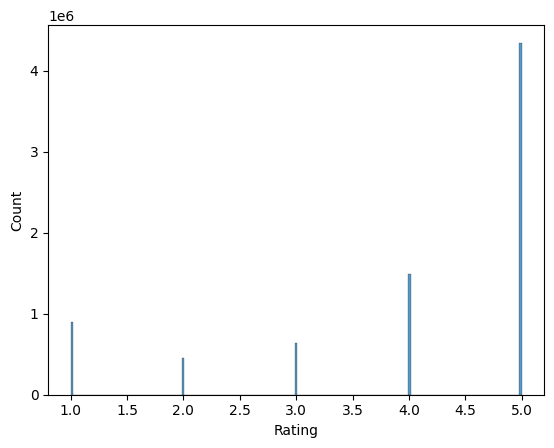

In [9]:
sns.histplot(dt["Rating"],kde=False)

In [ ]:
cek data jumlah idUser yang muncul

In [13]:
dt1=dt["idUser"].value_counts()
print(dt1.info)

<bound method Series.info of idUser
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1IUWX30VMVJGP      1
A1WBP7XSZI6AUL      1
A2K7UNJHE9ZR0G      1
A1A6SIW6EWF6FP      1
A10M2KEFPEQDHN      1
Name: count, Length: 4201696, dtype: int64>


In [71]:
sample = dt.sample(frac=0.01, random_state=42)
sample.reset_index(drop=True, inplace=True)
print(sample)

              idUser    idProduk  Rating       Waktu
0      ASJ5073GPUBTT  B00EPKSVRA     4.0  1405987200
1     A24JD5QEY22A7D  B000OH63MI     3.0  1202515200
2     A1UMI3D3SGG64F  B0012J52OC     5.0  1355443200
3     A2V4GFKI8KD8N5  B0012X5766     5.0  1235433600
4     A214NOONL728JH  B000VY2BC0     4.0  1215907200
...              ...         ...     ...         ...
1560  A36UGN8H4QCWTZ  B005DKZTMG     5.0  1391990400
1561  A2Q6LX5M21STUW  B0083Q3NO8     5.0  1344816000
1562  A17X8YPQGBIHU5  B007Q9BZQ6     1.0  1362960000
1563   ARD0BL0ACIW49  B003CJTR8M     5.0  1391212800
1564   A4L08PV1YJH83  B003J8PCL2     5.0  1362528000

[1565 rows x 4 columns]


In [72]:
dt = sample

In [73]:
dt.shape

(1565, 4)

In [ ]:
cek rata rata rating  dari setiap user

In [27]:
dt.groupby('idProduk')['Rating'].mean().head().sort_values(ascending=False).head()  

idProduk
0594481813    5.000000
0972683275    4.384615
0594033926    4.000000
0970408005    3.000000
0439886341    1.000000
Name: Rating, dtype: float64

In [29]:
dt.groupby('idProduk')['Rating'].count().sort_values(ascending=False).head() 

idProduk
B0074BW614    387
B00DR0PDNE    325
B007WTAJTO    297
B003ELYQGG    241
B0019EHU8G    240
Name: Rating, dtype: int64

In [33]:
mean_rating['count'] = pd.DataFrame(dt.groupby('idProduk')['Rating'].mean()) 

In [34]:

mean_rating.head()

,Rating,count
idProduk,,
0439886341,1.000000,1.000000
0594033926,4.000000,4.000000
0594481813,5.000000,5.000000
0970408005,3.000000,3.000000
0972683275,4.384615,4.384615


In [39]:
Distribusi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156490 entries, 0 to 156489
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   idUser    156490 non-null  object 
 1   idProduk  156490 non-null  object 
 2   Rating    156490 non-null  float64
 3   Waktu     156490 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [ ]:


# Plotting histogram
plt.hist(dt['idUser'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('idUser')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



In [ ]:
Spliting data

In [63]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [64]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x000002464759F340>

In [65]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

A2KPB67P7YNRJH
B000IZ7BDG


In [66]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [67]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [68]:
test_pred = svd_model.test(testset)

In [69]:
accuracy.rmse(test_pred)

RMSE: 1.5284


1.5284092865891878

In [ ]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=5, sim_options={ 'user_based': False})

algo_i.fit(trainset)

In [43]:
dt.head(2)

,idUser,idProduk,Rating,Waktu
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600


In [75]:
data = Dataset.load_from_df(dt[['idUser', 'idProduk', 'Rating']], baca)

In [76]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [77]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x000002464759F540>

In [78]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

AE0B60JTS5MA1
B00C5PUFDA


In [79]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [80]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [81]:
test_pred = svd_model.test(testset)

In [82]:
accuracy.rmse(test_pred)

RMSE: 1.4531


1.4531077892096789

In [83]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=5, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [84]:
test_pred=algo_i.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 1.4531
1.4531077892096789


In [106]:
uid="A24JD5QEY22A7D"
iid="B0012X5766"
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: A24JD5QEY22A7D item: B0012X5766 r_ui = 0.00   est = 4.06   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [110]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == "B0012X5766" ][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
